In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-09-07 14:09:34.065746: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open three different DataFrames, one for an extended parameter list, one with mean values over 7x7 pixels, and one with 3x3 gradients. 

# Then merge the two dataframes and use predictors from both.

# Open dict with collocated ASCAT data with extended parameters

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_ifs_extended.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df_extended = pd.concat(d.values(), ignore_index=True)
df_extended

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,f_usable_mid,f_usable_aft,f_kp_fore,f_kp_mid,f_kp_aft,f_land_fore,f_land_mid,f_land_aft,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,0.0,0.0,0.0,0.0,0.0,0.039,0.053,0.047,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,0.0,0.0,0.0,0.0,0.0,0.039,0.053,0.047,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,0.0,0.0,0.0,0.0,0.0,0.045,0.116,0.044,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,0.0,0.0,0.0,0.0,0.0,0.045,0.116,0.044,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,9.854824,-1.954211
9994,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.869203,-2.273894
9995,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.593998,-2.340672
9996,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.223359,-1.862569


In [6]:
df_extended = df_extended.dropna(subset=['UWr', 'rhoair'])
df_extended

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,f_usable_mid,f_usable_aft,f_kp_fore,f_kp_mid,f_kp_aft,f_land_fore,f_land_mid,f_land_aft,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,0.0,0.0,0.0,0.0,0.0,0.039,0.053,0.047,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,0.0,0.0,0.0,0.0,0.0,0.039,0.053,0.047,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,0.0,0.0,0.0,0.0,0.0,0.045,0.116,0.044,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,0.0,0.0,0.0,0.0,0.0,0.045,0.116,0.044,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,9.854824,-1.954211
9994,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.869203,-2.273894
9995,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.593998,-2.340672
9996,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,7.223359,-1.862569


In [7]:
df_extended = df_extended.sample(frac = 1, random_state=77)
df_extended     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,f_usable_mid,f_usable_aft,f_kp_fore,f_kp_mid,f_kp_aft,f_land_fore,f_land_mid,f_land_aft,u10,v10
9626,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.958139,-1.545760
4101,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.971909,-4.344576
8683,-0.012150,-0.032903,348.149998,2482.060605,1010.236972,1011.460995,6.507286,6.503420,96.736003,96.881840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.204488,3.573421
6116,0.155169,-0.072199,376.110002,2449.791792,1012.087269,1013.244498,14.877578,14.933106,85.877700,85.194925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.136973,0.297775
4981,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.032828,-0.430503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9119,-0.203744,-0.248952,334.574997,2470.989855,994.680703,995.886502,4.406105,4.615132,69.006350,67.089942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.278823,-1.836160
7832,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.810270,17.208559
9509,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.257064,9.131248
2283,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.450890,-3.203395


# Open dict with collocated ASCAT data with mean values over 7x7 grid

In [8]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [9]:
with open(data_dir + 'collocated_dict_ascat_mean_7x7_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [10]:
df_mean7x7 = pd.concat(d.values(), ignore_index=True)
df_mean7x7

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.258781,67.433670,22.743671,61.695915,50.551224,61.556122,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.258781,67.433670,22.743671,61.695915,50.551224,61.556122,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.643280,-98.673882,-52.707344,57.549995,46.082859,57.438168,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.643280,-98.673882,-52.707344,57.549995,46.082859,57.438168,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,55.998528,101.448814,146.780594,38.544704,28.932056,38.514412,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.371224,-57.958775,-102.696526,58.903469,47.875103,59.018360,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
10239,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.166321,60.492649,15.750000,52.309795,41.424080,52.259796,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
10240,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.166321,60.492649,15.750000,52.309795,41.424080,52.259796,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
10241,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.206573,-99.382286,-53.537422,51.728283,40.844284,51.631428,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [11]:
df_mean7x7 = df_mean7x7.dropna(subset=['UWr', 'rhoair'])
df_mean7x7

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.258781,67.433670,22.743671,61.695915,50.551224,61.556122,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.258781,67.433670,22.743671,61.695915,50.551224,61.556122,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.643280,-98.673882,-52.707344,57.549995,46.082859,57.438168,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.643280,-98.673882,-52.707344,57.549995,46.082859,57.438168,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,55.998528,101.448814,146.780594,38.544704,28.932056,38.514412,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.371224,-57.958775,-102.696526,58.903469,47.875103,59.018360,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
10239,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.166321,60.492649,15.750000,52.309795,41.424080,52.259796,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
10240,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.166321,60.492649,15.750000,52.309795,41.424080,52.259796,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
10241,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.206573,-99.382286,-53.537422,51.728283,40.844284,51.631428,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [12]:
df_mean7x7 = df_mean7x7.sample(frac = 1, random_state=77)
df_mean7x7

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
1021,0.001782,0.000093,371.484998,2458.009279,1011.868144,1013.037003,13.392523,13.305839,90.438449,89.768469,...,115.157921,70.284996,25.544584,50.996250,40.385418,50.870419,20161017T234800Z,20161018T012958.125000Z,1.562817,-0.072222
8319,-0.012150,-0.032903,235.910527,2490.682423,1024.758077,1026.018433,3.618056,3.690585,72.003161,70.689212,...,103.337753,58.686115,13.992856,57.315510,46.251427,57.263264,20210407T192100Z,20210407T210258.125000Z,5.125797,-3.413611
5481,0.050743,0.185299,340.294737,2484.218275,994.332208,995.538953,4.828401,4.883872,73.159460,72.295820,...,72.563271,117.101845,161.548981,56.841225,45.763264,56.661633,20161208T131200Z,20161208T145358.125000Z,8.275084,6.100164
24,-0.228433,0.119486,318.164999,2475.939764,1007.714327,1008.913007,7.096543,7.200788,77.793648,74.634261,...,112.693260,67.873466,23.055511,59.282860,48.124691,59.207134,20180410T030000Z,20180410T044458.125000Z,2.763711,1.752537
3060,0.009946,-0.040725,320.855002,2482.849903,997.338129,998.550006,5.862060,5.884601,90.702000,90.576984,...,-16.857756,-61.516117,-106.146538,48.343266,37.708164,48.360004,20161007T135100Z,20161007T152958.125000Z,-0.966533,3.281086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,301.965001,2491.126289,1015.883896,1017.144498,3.200247,3.267256,74.825154,73.883102,...,-18.339592,-63.027138,-107.893265,44.879791,34.569183,44.961220,20210120T123300Z,20210120T141458.125000Z,-10.460773,-6.665235
9509,-0.117259,-0.124501,358.460001,2475.763973,1010.089960,1011.300494,7.740276,7.737790,94.784452,94.860108,...,102.092850,57.455505,12.912857,58.240410,47.163261,58.127552,20190812T203300Z,20190812T221458.125000Z,2.308954,-3.119556
2283,-0.175301,0.137656,245.100003,2483.387743,1013.904479,1015.144501,3.383261,3.524088,62.881447,60.933615,...,-145.291595,-99.640388,-53.939598,51.941601,41.123199,51.851196,20180120T003300Z,20180120T021758.125000Z,0.494966,1.721997
10196,0.078067,-0.018678,278.325000,2491.370881,979.607813,980.827499,3.435529,3.496055,82.756252,82.163943,...,-13.453673,-58.034081,-102.635712,58.308567,47.280609,58.358368,20200113T140600Z,20200113T154458.125000Z,-3.682891,16.288317


### Rename columns so that we can recognize them after merging

In [13]:
df_mean7x7 = df_mean7x7.rename(
    columns={
        'sigma0_trip_fore': 'sigma0_trip_fore_mean7x7', 
        'sigma0_trip_mid': 'sigma0_trip_mid_mean7x7',
        'sigma0_trip_aft': 'sigma0_trip_aft_mean7x7',
        'azi_angle_trip_fore': 'azi_angle_trip_fore_mean7x7',
        'azi_angle_trip_mid': 'azi_angle_trip_mid_mean7x7', 
        'azi_angle_trip_aft': 'azi_angle_trip_aft_mean7x7',
        'inc_angle_trip_fore': 'inc_angle_trip_fore_mean7x7', 
        'inc_angle_trip_mid': 'inc_angle_trip_mid_mean7x7', 
        'inc_angle_trip_aft': 'inc_angle_trip_aft_mean7x7',
        'start_sensing_time': 'start_sensing_time_mean7x7',
        'stop_sensing_time': 'stop_sensing_time_mean7x7'
    }
)

In [14]:
df_mean7x7

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore_mean7x7,azi_angle_trip_mid_mean7x7,azi_angle_trip_aft_mean7x7,inc_angle_trip_fore_mean7x7,inc_angle_trip_mid_mean7x7,inc_angle_trip_aft_mean7x7,start_sensing_time_mean7x7,stop_sensing_time_mean7x7,u10,v10
1021,0.001782,0.000093,371.484998,2458.009279,1011.868144,1013.037003,13.392523,13.305839,90.438449,89.768469,...,115.157921,70.284996,25.544584,50.996250,40.385418,50.870419,20161017T234800Z,20161018T012958.125000Z,1.562817,-0.072222
8319,-0.012150,-0.032903,235.910527,2490.682423,1024.758077,1026.018433,3.618056,3.690585,72.003161,70.689212,...,103.337753,58.686115,13.992856,57.315510,46.251427,57.263264,20210407T192100Z,20210407T210258.125000Z,5.125797,-3.413611
5481,0.050743,0.185299,340.294737,2484.218275,994.332208,995.538953,4.828401,4.883872,73.159460,72.295820,...,72.563271,117.101845,161.548981,56.841225,45.763264,56.661633,20161208T131200Z,20161208T145358.125000Z,8.275084,6.100164
24,-0.228433,0.119486,318.164999,2475.939764,1007.714327,1008.913007,7.096543,7.200788,77.793648,74.634261,...,112.693260,67.873466,23.055511,59.282860,48.124691,59.207134,20180410T030000Z,20180410T044458.125000Z,2.763711,1.752537
3060,0.009946,-0.040725,320.855002,2482.849903,997.338129,998.550006,5.862060,5.884601,90.702000,90.576984,...,-16.857756,-61.516117,-106.146538,48.343266,37.708164,48.360004,20161007T135100Z,20161007T152958.125000Z,-0.966533,3.281086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7832,-0.012150,-0.032903,301.965001,2491.126289,1015.883896,1017.144498,3.200247,3.267256,74.825154,73.883102,...,-18.339592,-63.027138,-107.893265,44.879791,34.569183,44.961220,20210120T123300Z,20210120T141458.125000Z,-10.460773,-6.665235
9509,-0.117259,-0.124501,358.460001,2475.763973,1010.089960,1011.300494,7.740276,7.737790,94.784452,94.860108,...,102.092850,57.455505,12.912857,58.240410,47.163261,58.127552,20190812T203300Z,20190812T221458.125000Z,2.308954,-3.119556
2283,-0.175301,0.137656,245.100003,2483.387743,1013.904479,1015.144501,3.383261,3.524088,62.881447,60.933615,...,-145.291595,-99.640388,-53.939598,51.941601,41.123199,51.851196,20180120T003300Z,20180120T021758.125000Z,0.494966,1.721997
10196,0.078067,-0.018678,278.325000,2491.370881,979.607813,980.827499,3.435529,3.496055,82.756252,82.163943,...,-13.453673,-58.034081,-102.635712,58.308567,47.280609,58.358368,20200113T140600Z,20200113T154458.125000Z,-3.682891,16.288317


In [15]:
df_extended['start_sensing_time']

9626    20191018T122400Z
4101    20151216T131800Z
8683    20210703T221800Z
6116    20170906T005100Z
4981    20160825T133900Z
              ...       
9119    20181127T232700Z
7832    20210223T120600Z
9509    20190926T202700Z
2283    20180208T151200Z
8799    20210724T123300Z
Name: start_sensing_time, Length: 9998, dtype: object

In [16]:
df_extended['lat']

9626    59.9337
4101   -54.4041
8683    59.9337
6116    40.1334
4981   -54.4041
         ...   
9119    40.1334
7832    59.9337
9509    59.9337
2283    40.1334
8799    59.9337
Name: lat, Length: 9998, dtype: float64

# DataFrame with gradients

In [17]:
with open(data_dir + 'collocated_dict_ascat_gradient_3x3_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [18]:
df_grad = pd.concat(d.values(), ignore_index=True)
df_grad

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
9165,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
9166,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
9167,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [19]:
df_grad = df_grad.dropna(subset=['UWr', 'rhoair'])
df_grad

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,0.004358,-0.221627,340.649998,2477.589490,1016.508053,1017.731516,4.405489,4.587935,60.655199,58.351445,...,56.239998,101.639999,146.940002,36.759998,27.439999,36.730000,20180404T175400Z,20180404T193258.125000Z,4.476319,0.497334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
9165,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894
9166,0.078067,-0.018678,281.330002,2491.649510,994.284652,995.514005,4.237512,4.264786,90.106352,89.978233,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.593998,-2.340672
9167,0.078067,-0.018678,236.134998,2491.793851,994.133050,995.364493,3.745458,3.792684,82.634552,82.112733,...,-145.229996,-99.439995,-53.639999,52.279999,41.049999,52.180000,20200121T214800Z,20200121T232958.125000Z,7.223359,-1.862569


In [20]:
df_grad = df_grad.sample(frac = 1, random_state=77)
df_grad     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
1503,-0.042230,-0.334789,369.599998,2477.906722,1000.300826,1001.498499,7.974965,7.921645,97.577349,97.796572,...,54.889999,100.500000,145.979996,46.410000,35.730000,46.410000,20170526T140900Z,20170526T155058.125000Z,-2.172911,2.352134
4087,0.038686,0.082603,348.859995,2482.019101,992.072293,993.273495,6.127340,6.146534,89.098558,88.902068,...,-162.050003,-117.579994,-73.059998,58.379997,47.419998,58.520000,20160314T041200Z,20160314T055358.125000Z,16.120512,0.982410
8890,0.078067,-0.018678,322.135001,2486.252920,992.402913,993.617993,4.841986,4.883098,85.735253,85.364232,...,-11.090000,-55.649998,-100.449997,63.250000,52.360001,63.570000,20191109T141500Z,20191109T155658.125000Z,-5.969720,-6.151449
6597,-0.012150,-0.032903,310.074997,2488.131506,977.608494,978.824002,3.753534,3.801537,87.686853,87.442990,...,-17.129999,-61.789997,-106.739998,46.980000,36.489998,47.259998,20201111T135100Z,20201111T152958.125000Z,-2.866442,14.121944
1565,0.111582,-0.016399,376.785001,2470.839518,1007.676844,1008.868503,9.054920,9.040190,89.332898,88.474956,...,116.540001,71.669998,26.650000,37.730000,28.279999,37.700001,20180930T031800Z,20180930T045958.125000Z,1.973004,0.335455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4832,0.108413,0.517571,330.450005,2486.419860,1007.737764,1008.967007,5.635789,5.639626,95.155485,95.193701,...,70.150002,114.680000,159.139999,48.669998,37.969997,48.500000,20161025T132400Z,20161025T150258.125000Z,13.576246,5.677454
9119,0.078067,-0.018678,269.295003,2491.675542,980.709209,981.951001,2.038906,2.166475,70.647104,69.665131,...,-18.180000,-62.869999,-107.879997,42.959999,32.880001,43.209999,20200112T134500Z,20200112T152358.125000Z,13.502748,5.582858
7832,-0.012150,-0.032903,343.024994,2487.964085,993.379376,994.591995,5.564891,5.561886,92.930303,92.888906,...,-15.780000,-60.399998,-105.009995,52.590000,41.669998,52.619999,20210609T135100Z,20210609T153258.125000Z,0.451083,7.852533
2283,0.066199,-0.093856,347.385001,2477.379817,1020.312158,1021.544498,6.128193,6.172027,86.986450,86.726191,...,57.360001,102.909996,148.360001,39.709999,29.869999,39.680000,20160730T123600Z,20160730T141458.125000Z,6.541875,1.584597


# Merge

In [21]:
merged_df = pd.merge(df_extended, df_mean7x7)
merged_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,sigma0_trip_mid_mean7x7,sigma0_trip_aft_mean7x7,azi_angle_trip_fore_mean7x7,azi_angle_trip_mid_mean7x7,azi_angle_trip_aft_mean7x7,inc_angle_trip_fore_mean7x7,inc_angle_trip_mid_mean7x7,inc_angle_trip_aft_mean7x7,start_sensing_time_mean7x7,stop_sensing_time_mean7x7
0,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,-19.902517,-23.376953,54.779797,100.623253,146.343674,49.280197,38.284489,49.275711,20191018T122400Z,20191018T140558.125000Z
1,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,-17.821983,-16.549332,71.326324,115.859177,160.311218,53.260811,42.305099,53.091835,20151216T131800Z,20151216T145958.125000Z
2,-0.012150,-0.032903,348.149998,2482.060605,1010.236972,1011.460995,6.507286,6.503420,96.736003,96.881840,...,-17.280510,-22.040539,-145.900543,-99.973244,-54.090271,51.156216,40.262432,51.030270,20210703T221800Z,20210703T235958.125000Z
3,0.155169,-0.072199,376.110002,2449.791792,1012.087269,1013.244498,14.877578,14.933106,85.877700,85.194925,...,-14.900146,-16.599939,-145.320419,-99.668335,-53.968750,51.947918,41.115002,51.855000,20170906T005100Z,20170906T023258.125000Z
4,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,-9.319918,-15.959322,67.811905,112.494522,157.060959,37.738571,28.348331,37.579285,20160825T133900Z,20160825T151758.125000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.203744,-0.248952,334.574997,2470.989855,994.680703,995.886502,4.406105,4.615132,69.006350,67.089942,...,-10.902283,-14.381560,115.326065,70.451424,25.526789,51.638569,40.980354,51.589283,20181127T232700Z,20181128T011158.125000Z
9994,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,-18.492966,-16.619625,49.691425,96.197548,142.534286,62.820000,51.321430,62.842239,20210223T120600Z,20210223T134458.125000Z
9995,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,-17.058355,-20.217432,107.476326,62.753674,17.919796,44.959389,34.654285,44.923878,20190926T202700Z,20190926T220858.125000Z
9996,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,-17.731636,-22.640322,-24.681429,-69.451836,-114.288567,59.352245,48.297138,59.430813,20180208T151200Z,20180208T165058.125000Z


In [22]:
merged_df = pd.merge(merged_df, df_grad)
merged_df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,inc_angle_trip_mid_mean7x7,inc_angle_trip_aft_mean7x7,start_sensing_time_mean7x7,stop_sensing_time_mean7x7,sigma0_trip_fore_x,sigma0_trip_mid_x,sigma0_trip_aft_x,sigma0_trip_fore_y,sigma0_trip_mid_y,sigma0_trip_aft_y
0,0.078067,-0.018678,308.009999,2485.276604,1021.886352,1023.132504,5.283941,5.307423,89.166352,88.956158,...,38.284489,49.275711,20191018T122400Z,20191018T140558.125000Z,0.408459,1.479952,2.084969,0.629761,0.571806,2.106411
1,0.455734,0.214497,342.430002,2485.382490,1009.739629,1010.974509,4.963379,5.000481,88.237874,87.991604,...,42.305099,53.091835,20151216T131800Z,20151216T145958.125000Z,-1.198624,2.274524,0.724269,0.404388,0.991711,1.061945
2,-0.012150,-0.032903,348.149998,2482.060605,1010.236972,1011.460995,6.507286,6.503420,96.736003,96.881840,...,40.262432,51.030270,20210703T221800Z,20210703T235958.125000Z,-6.663434,-7.580779,-6.719872,3.294552,4.027552,2.588449
3,0.618789,0.095465,337.542105,2486.613571,1003.750346,1004.976852,5.077564,5.106566,88.221949,87.935179,...,28.348331,37.579285,20160825T133900Z,20160825T151758.125000Z,-0.172565,-0.300552,-0.001308,0.179888,-0.096291,0.146578
4,-0.404968,-0.436143,372.839998,2466.864709,1023.829957,1025.037982,8.287720,8.411893,80.428049,79.136029,...,45.377144,56.720200,20180701T173000Z,20180701T191158.125000Z,14.701262,13.926298,12.713902,0.420946,1.023985,0.897704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,-0.203744,-0.248952,334.574997,2470.989855,994.680703,995.886502,4.406105,4.615132,69.006350,67.089942,...,40.980354,51.589283,20181127T232700Z,20181128T011158.125000Z,-3.402098,2.637513,-2.395237,-0.511039,-3.503876,-5.101947
9165,-0.012150,-0.032903,265.205005,2491.979453,989.732447,990.964005,2.700275,2.784448,65.272654,63.861253,...,51.321430,62.842239,20210223T120600Z,20210223T134458.125000Z,0.224949,0.953169,0.381359,-0.020716,-0.559778,-0.479246
9166,0.078067,-0.018678,334.165001,2481.488700,1006.442064,1007.660013,5.957429,6.000322,86.412503,85.791253,...,34.654285,44.923878,20190926T202700Z,20190926T220858.125000Z,1.468090,2.569818,2.065495,-4.070202,-3.373359,-4.396906
9167,-0.155996,-0.001206,294.130000,2482.470287,1023.041099,1024.315005,2.590541,2.709164,68.665147,66.956363,...,48.297138,59.430813,20180208T151200Z,20180208T165058.125000Z,-0.667807,-1.491917,-0.198313,-0.423704,-0.368019,-0.470245


In [23]:
df = merged_df

# _______________________________________________________________________________
# Remove the flags from the predictors
# ________________________________________________________________________________

# Drop data with poor quality

## F_usable == 2 is bad
## F_kp == 1 is bad

In [24]:
df.loc[df['f_usable_fore'] == 2, 'sigma0_trip_fore'] =  df['sigma0_trip_fore'].mean()
df.loc[df['f_usable_mid'] == 2, 'sigma0_trip_mid'] = np.nan
df.loc[df['f_usable_aft'] == 2, 'sigma0_trip_aft'] = np.nan

df.loc[df['f_kp_fore'] == 1, 'sigma0_trip_fore'] = np.nan
df.loc[df['f_kp_mid'] == 1, 'sigma0_trip_mid'] = np.nan
df.loc[df['f_kp_aft'] == 1, 'sigma0_trip_aft'] = np.nan

df.loc[df['f_land_fore'] == 1, 'sigma0_trip_fore'] = np.nan
df.loc[df['f_land_mid'] == 1, 'sigma0_trip_mid'] = np.nan
df.loc[df['f_land_aft'] == 1, 'sigma0_trip_aft'] = np.nan

In [25]:
df[['sigma0_trip_fore','sigma0_trip_mid', 'sigma0_trip_aft']].isna().sum()

sigma0_trip_fore    80
sigma0_trip_mid     68
sigma0_trip_aft     96
dtype: int64

In [26]:
(df[['f_usable_fore','f_usable_mid', 'f_usable_aft']] == 2).sum()

f_usable_fore    12
f_usable_mid      9
f_usable_aft     10
dtype: int64

In [27]:
(df[['f_kp_fore','f_kp_mid', 'f_kp_aft']] == 1).sum()

f_kp_fore    3
f_kp_mid     0
f_kp_aft     1
dtype: int64

In [28]:
(df[['f_land_fore','f_land_mid', 'f_land_aft']] == 1).sum()

f_land_fore    77
f_land_mid     59
f_land_aft     86
dtype: int64

In [29]:
for c in df.columns:
    if df[c].isna().sum()>0:
        print(c)

rain
sigma0_trip_fore
sigma0_trip_mid
sigma0_trip_aft


In [30]:
df = df.drop(['rain'], axis=1)

In [31]:
df=df.dropna()

In [32]:
df.shape

(9067, 96)

In [33]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

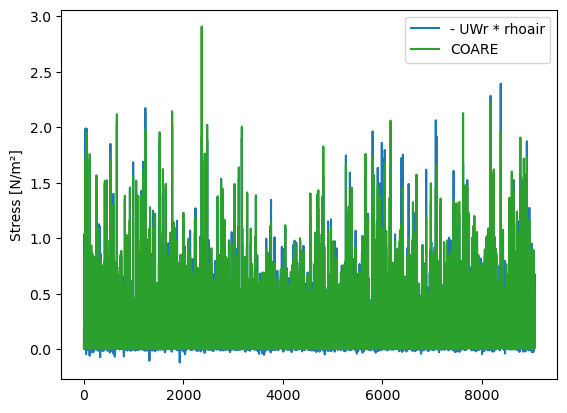

In [34]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

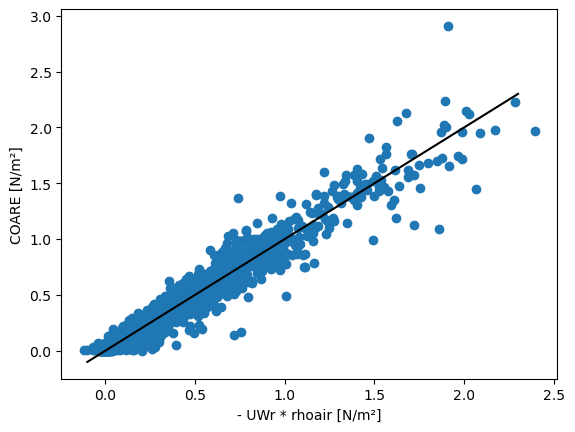

In [35]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [36]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [37]:
df.shape

(9067, 96)

In [38]:
df.shape[0]*0.8

7253.6

In [39]:
split_idx = int(df.shape[0]*0.8)

### Prepare features and labels

In [40]:
predictor_variables = [
    'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10',
    'sigma0_trip_fore_x', 'sigma0_trip_mid_x', 'sigma0_trip_aft_x',
    'sigma0_trip_fore_y', 'sigma0_trip_mid_y', 'sigma0_trip_aft_y',
    'sigma0_trip_fore_mean7x7', 'sigma0_trip_mid_mean7x7', 'sigma0_trip_aft_mean7x7'
]

In [41]:
x = df[predictor_variables]
x

,sigma0_trip_fore,sigma0_trip_mid,sigma0_trip_aft,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10,sigma0_trip_fore_x,sigma0_trip_mid_x,sigma0_trip_aft_x,sigma0_trip_fore_y,sigma0_trip_mid_y,sigma0_trip_aft_y,sigma0_trip_fore_mean7x7,sigma0_trip_mid_mean7x7,sigma0_trip_aft_mean7x7
0,-23.692396,-19.716181,-23.761959,54.949997,100.769997,146.470001,48.789997,37.829998,48.779999,-5.958139,-1.545760,0.408459,1.479952,2.084969,0.629761,0.571806,2.106411,-23.518875,-19.902517,-23.376953
1,-21.523678,-17.208441,-15.873583,71.339996,115.869995,160.309998,52.719997,41.770000,52.549999,8.971909,-4.344576,-1.198624,2.274524,0.724269,0.404388,0.991711,1.061945,-21.562891,-17.821983,-16.549332
2,-17.890451,-15.187499,-22.701605,-146.860001,-101.159996,-55.509998,46.570000,35.770000,46.419998,-4.204488,3.573421,-6.663434,-7.580779,-6.719872,3.294552,4.027552,2.588449,-20.565887,-17.280510,-22.040539
3,-15.948977,-8.738081,-16.258532,67.699997,112.379997,156.949997,37.180000,27.869999,37.009998,3.032828,-0.430503,-0.172565,-0.300552,-0.001308,0.179888,-0.096291,0.146578,-16.173889,-9.319918,-15.959322
5,-18.624861,-16.817167,-21.128984,-25.539999,-70.320000,-115.079994,46.989998,36.419998,47.000000,1.774315,-0.606478,7.802051,6.872423,9.520684,0.387598,1.259590,3.101778,-12.959089,-11.200004,-14.232991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,-16.974600,-12.214600,-18.855486,115.610001,70.769997,25.869999,50.689999,39.770000,50.629997,1.278823,-1.836160,-3.402098,2.637513,-2.395237,-0.511039,-3.503876,-5.101947,-13.974460,-10.902283,-14.381560
9165,-21.509340,-18.463285,-16.534340,49.649998,96.159996,142.500000,62.919998,51.419998,62.949997,-4.810270,17.208559,0.224949,0.953169,0.381359,-0.020716,-0.559778,-0.479246,-21.305622,-18.492966,-16.619625
9166,-22.868994,-17.679859,-20.473143,106.619995,61.910000,17.100000,45.549999,35.090000,45.509998,-8.257064,9.131248,1.468090,2.569818,2.065495,-4.070202,-3.373359,-4.396906,-22.282558,-17.058355,-20.217432
9167,-18.350641,-18.557043,-23.477961,-24.510000,-69.269997,-114.119995,60.549999,49.480000,60.639999,1.450890,-3.203395,-0.667807,-1.491917,-0.198313,-0.423704,-0.368019,-0.470245,-17.774757,-17.731636,-22.640322


In [42]:
y = - df['UWr'] * df['rhoair']
y

0       0.004143
1       0.163965
2       0.048829
3       0.057230
5       0.073337
          ...   
9164    0.352143
9165    0.239322
9166    0.028252
9167    0.109268
9168    0.570802
Length: 9067, dtype: float64

In [43]:
for c in x.columns:
    if x[c].isna().sum()>0:
        print(c)

In [44]:
y.isna().sum()

0

In [45]:
c = df['stress']

In [46]:
df.shape[0]*0.8

7253.6

In [47]:
split_idx = int(df.shape[0]*0.8)

In [48]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [49]:
c = df['stress']

In [50]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [51]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [52]:
c_train = c[:split_idx]
c_test = c[split_idx:]

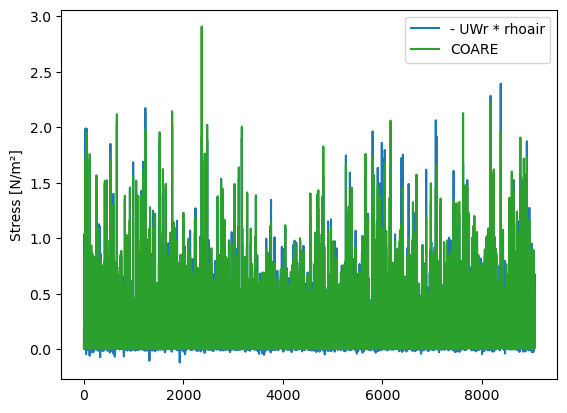

In [53]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [54]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

In [55]:
x_train_std

array([ 5.4370826 ,  5.35444368,  5.42251842, 91.13864959, 83.90098788,
       99.33900986,  8.20998293,  7.63509247,  8.21554403,  5.18202425,
        5.29342088, 61.1881806 ,  5.35187444, 35.8818577 , 43.3209818 ,
        3.41429065, 35.37610125,  9.20428758,  5.36515255,  8.85027551])

In [56]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [57]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [58]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-09-07 14:09:37.231979: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-09-07 14:09:37.232223: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-07 14:09:37.232231: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-07 14:09:37.232247: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-4l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-09-07 14:09:37.232403: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

10/10 [==============================] - 1s 74ms/step - loss: 8.9744 - mean_absolute_error: 1.9928 - val_loss: 1.0467 - val_mean_absolute_error: 0.6947
Epoch 2/500
10/10 [==============================] - 0s 36ms/step - loss: 1.6860 - mean_absolute_error: 0.9068 - val_loss: 0.9399 - val_mean_absolute_error: 0.6319
Epoch 3/500
10/10 [==============================] - 0s 32ms/step - loss: 0.9872 - mean_absolute_error: 0.7216 - val_loss: 0.8071 - val_mean_absolute_error: 0.5930
Epoch 4/500
10/10 [==============================] - 0s 31ms/step - loss: 1.0735 - mean_absolute_error: 0.6970 - val_loss: 0.8572 - val_mean_absolute_error: 0.6135
Epoch 5/500
10/10 [==============================] - 0s 31ms/step - loss: 0.8803 - mean_absolute_error: 0.6300 - val_loss: 0.8494 - val_mean_absolute_error: 0.5734
Epoch 6/500
10/10 [==============================] - 0s 31ms/step - loss: 0.8749 - mean_absolute_error: 0.6084 - val_loss: 0.8375 - val_mean_absolute_error: 0.5527
Epoch 7/500
10/10 [=========

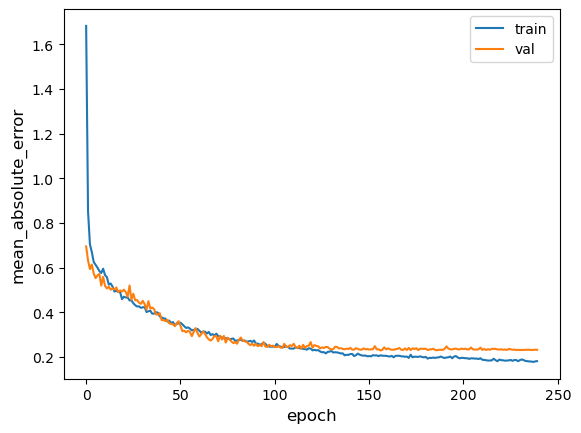

57/57 [==============================] - 0s 2ms/step - loss: 0.2041 - mean_absolute_error: 0.2422
Test accuracy 0.24220331013202667
Test loss 0.20411065220832825


In [59]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [60]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [61]:
rmse(y_test.values, y_test_pred)

0.334293524765552

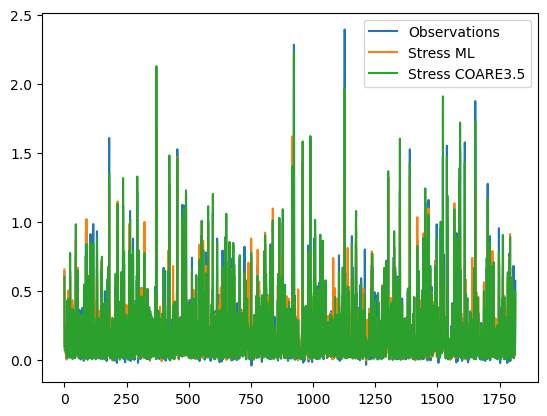

In [62]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

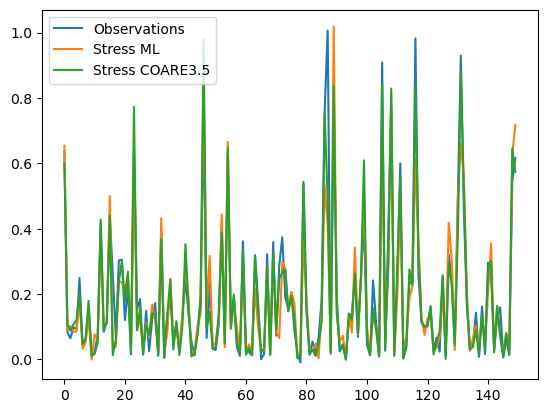

In [63]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [64]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.90989378],
       [0.90989378, 1.        ]])

In [65]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

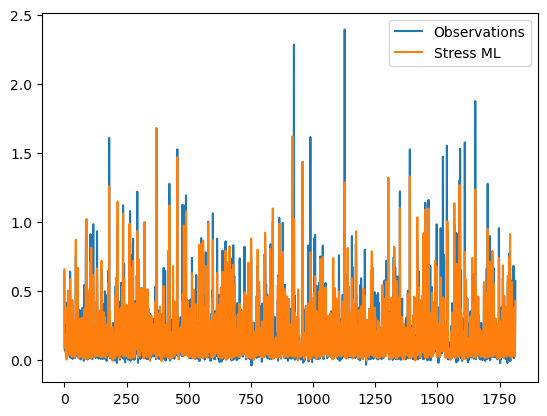

In [66]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [67]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

In [68]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.334293524765552

### plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

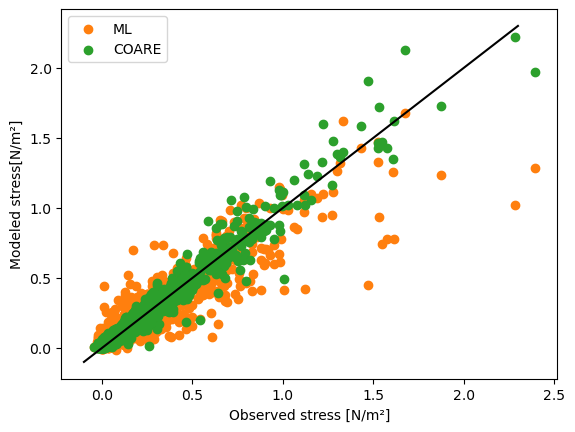

In [70]:
plt.scatter(y_test.values, y_test_pred, label='ML', color='C1')
plt.scatter(y_test.values, c_test.values, label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

# ML setup

In [71]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [72]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

# First experiment - Linear regression

In [73]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
159/159 [==============================] - 0s 1ms/step - loss: 1.5015 - mean_absolute_error: 0.7768 - val_loss: 1.4879 - val_mean_absolute_error: 0.7145
Epoch 2/500
159/159 [==============================] - 0s 686us/step - loss: 1.2007 - mean_absolute_error: 0.6585 - val_loss: 1.2510 - val_mean_absolute_error: 0.6335
Epoch 3/500
159/159 [==============================] - 0s 668us/step - loss: 1.0985 - mean_absolute_error: 0.6081 - val_loss: 1.0961 - val_mean_absolute_error: 0.5807
Epoch 4/500
159/159 [==============================] - 0s 672us/step - loss: 0.7950 - mean_absolute_error: 0.5369 - val_loss: 1.0000 - val_mean_absolute_error: 0.5523
Epoch 5/500
159/159 [==============================] - 0s 649us/step - loss: 0.8133 - mean_absolute_error: 0.5279 - val_loss: 0.9358 - val_mean_absolute_error: 0.5342
Epoch 6/500
159/159 [==============================] - 0s 637us/step - loss: 0.8366 - mean_absolute_error: 0.5321 - val_loss: 0.8863 - val_mean_absolute_error: 0.5230


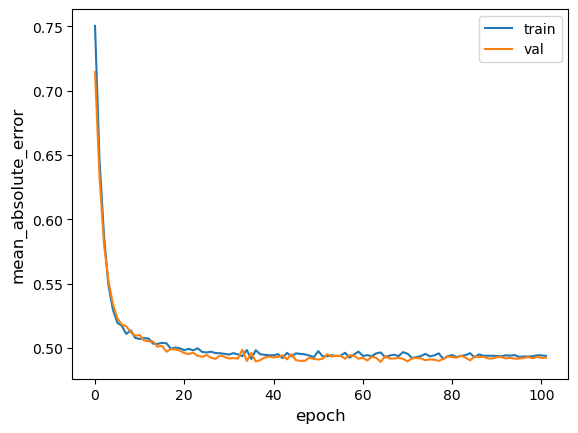

57/57 [==============================] - 0s 602us/step - loss: 0.7120 - mean_absolute_error: 0.5080
Test accuracy 0.507994532585144
Test loss 0.7119690179824829


In [74]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [75]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [76]:
np.mean(y_test)

0.1889375507066801

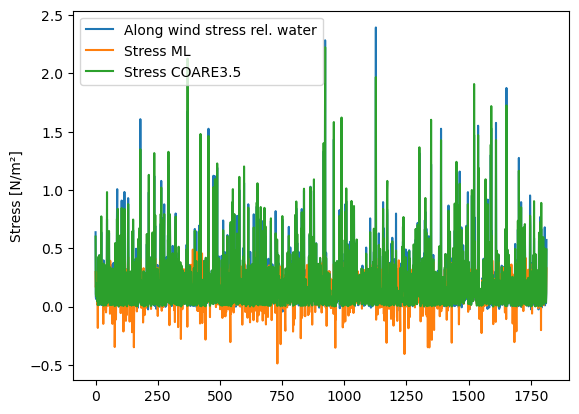

In [77]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

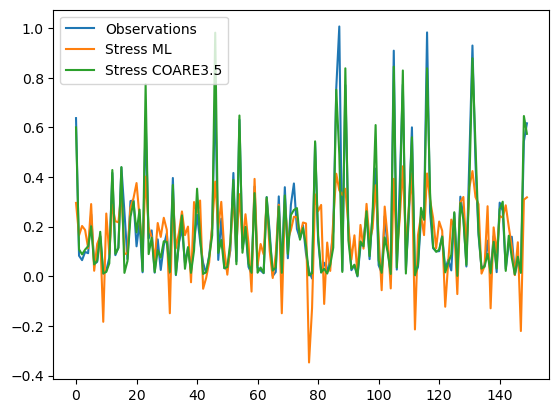

In [78]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

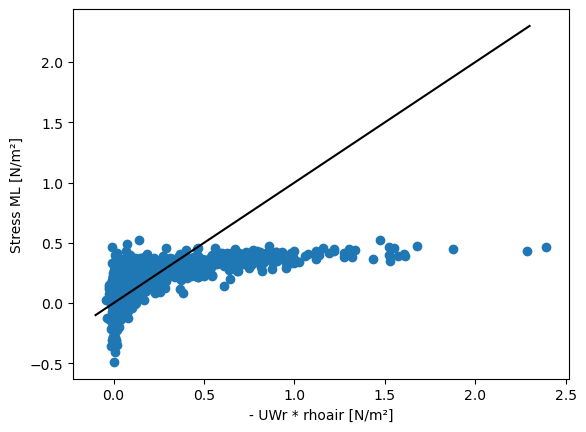

In [79]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

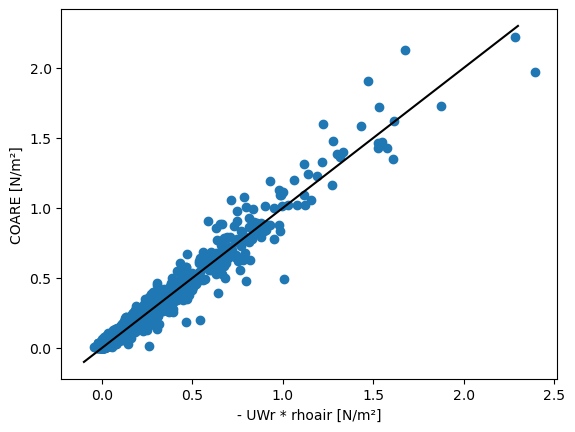

In [80]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [81]:
rmse(y_test.values, y_test_pred)

0.28954085636577975

In [82]:
rmse(y_test.values, c_test)

0.05160622726223209

## Correlation

In [83]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.62964871],
       [0.62964871, 1.        ]])

In [84]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

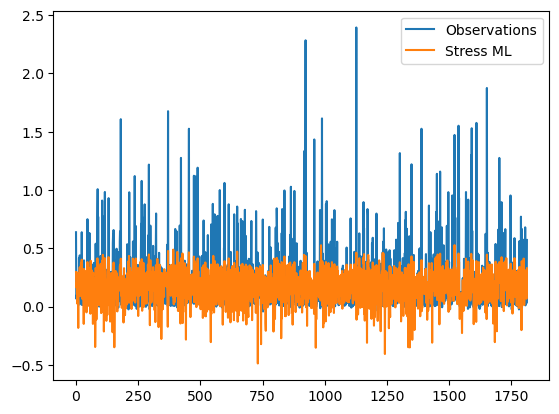

In [85]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [86]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.62964871],
       [0.62964871, 1.        ]])

In [87]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

In [88]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.28954085636577975

## Correlation

In [89]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.62964871],
       [0.62964871, 1.        ]])

In [90]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

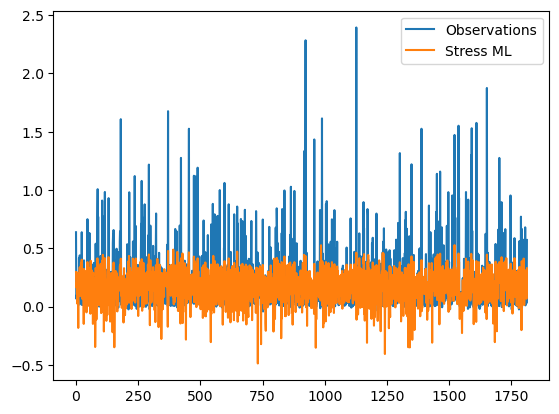

In [91]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [92]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.62964871],
       [0.62964871, 1.        ]])

In [93]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

In [94]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.28954085636577975

# Other experiments

In [95]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [96]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [97]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
159/159 [==============================] - 1s 2ms/step - loss: 1.5062 - mean_absolute_error: 0.8801 - val_loss: 0.6346 - val_mean_absolute_error: 0.4718
Epoch 2/500
159/159 [==============================] - 0s 1ms/step - loss: 0.8069 - mean_absolute_error: 0.6375 - val_loss: 0.5551 - val_mean_absolute_error: 0.4229
Epoch 3/500
159/159 [==============================] - 0s 1ms/step - loss: 0.6914 - mean_absolute_error: 0.5759 - val_loss: 0.4813 - val_mean_absolute_error: 0.3789
Epoch 4/500
159/159 [==============================] - 0s 1ms/step - loss: 0.5881 - mean_absolute_error: 0.5169 - val_loss: 0.5465 - val_mean_absolute_error: 0.3831
Epoch 5/500
159/159 [==============================] - 0s 1ms/step - loss: 0.4821 - mean_absolute_error: 0.4700 - val_loss: 0.4824 - val_mean_absolute_error: 0.3628
Epoch 6/500
159/159 [==============================] - 0s 1ms/step - loss: 0.4758 - mean_absolute_error: 0.4469 - val_loss: 0.4968 - val_mean_absolute_error: 0.3628
Epoch 7/50

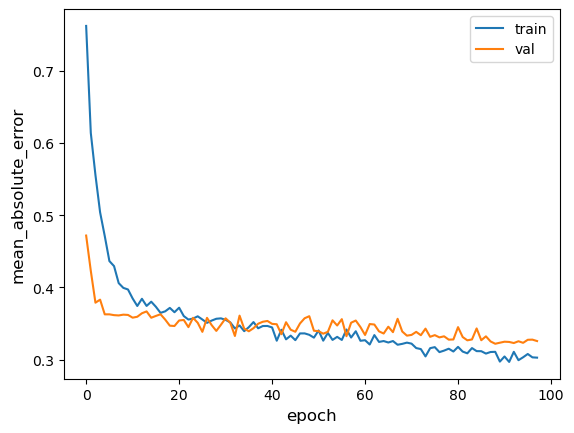

57/57 [==============================] - 0s 666us/step - loss: 0.3001 - mean_absolute_error: 0.3119
Test accuracy 0.3119165301322937
Test loss 0.3001471161842346


In [98]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [99]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [100]:
rmse(y_test.values, y_test_pred)

0.3147556357746957

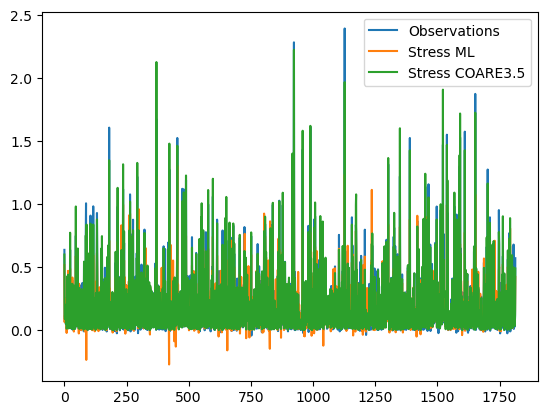

In [101]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

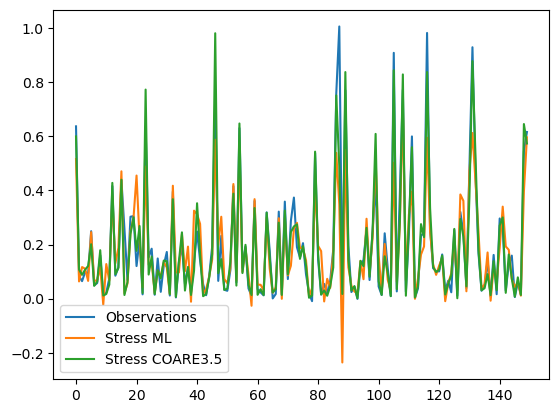

In [102]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

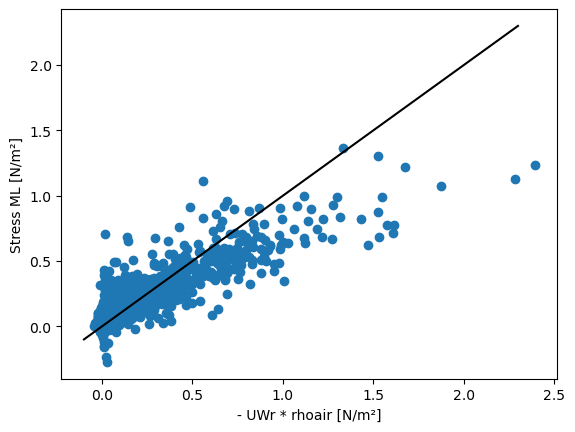

In [103]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [104]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87224174],
       [0.87224174, 1.        ]])

In [105]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

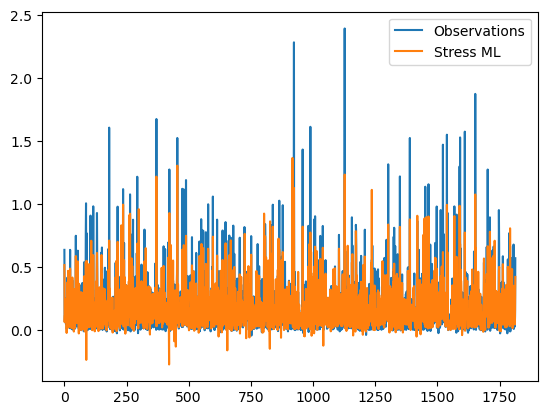

In [106]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [107]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

In [108]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.3147556357746957

Text(0, 0.5, 'Stress ML [N/m²]')

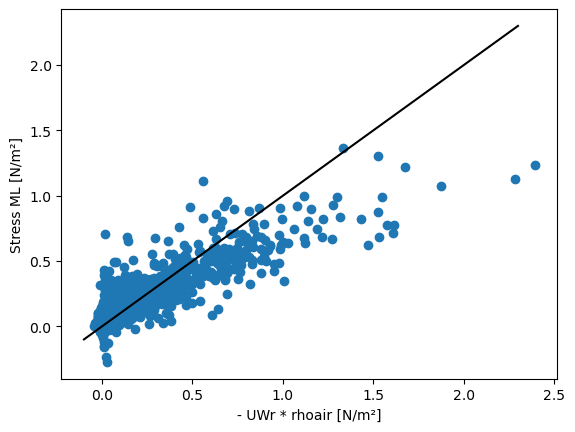

In [109]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [110]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87224174],
       [0.87224174, 1.        ]])

In [111]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

In [112]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [113]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [114]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
159/159 [==============================] - 1s 4ms/step - loss: 2.9905 - mean_absolute_error: 1.2484 - val_loss: 0.9353 - val_mean_absolute_error: 0.7310
Epoch 2/500
159/159 [==============================] - 1s 4ms/step - loss: 0.8503 - mean_absolute_error: 0.6580 - val_loss: 0.5653 - val_mean_absolute_error: 0.4553
Epoch 3/500
159/159 [==============================] - 1s 4ms/step - loss: 0.6001 - mean_absolute_error: 0.5559 - val_loss: 0.5144 - val_mean_absolute_error: 0.4077
Epoch 4/500
159/159 [==============================] - 1s 4ms/step - loss: 0.5434 - mean_absolute_error: 0.5034 - val_loss: 0.3811 - val_mean_absolute_error: 0.3518
Epoch 5/500
159/159 [==============================] - 1s 4ms/step - loss: 0.4844 - mean_absolute_error: 0.4564 - val_loss: 0.3623 - val_mean_absolute_error: 0.3368
Epoch 6/500
159/159 [==============================] - 1s 4ms/step - loss: 0.4163 - mean_absolute_error: 0.4241 - val_loss: 0.3591 - val_mean_absolute_error: 0.3285
Epoch 7/50

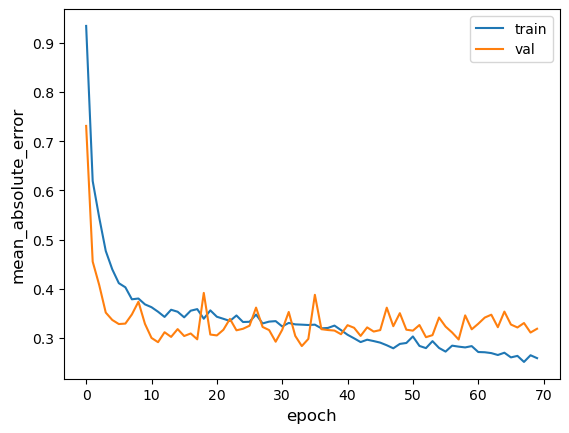

57/57 [==============================] - 0s 1ms/step - loss: 0.3430 - mean_absolute_error: 0.3297
Test accuracy 0.32966363430023193
Test loss 0.34297528862953186


In [115]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [116]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [117]:
rmse(y_test.values, y_test_pred)

0.2938084222666236

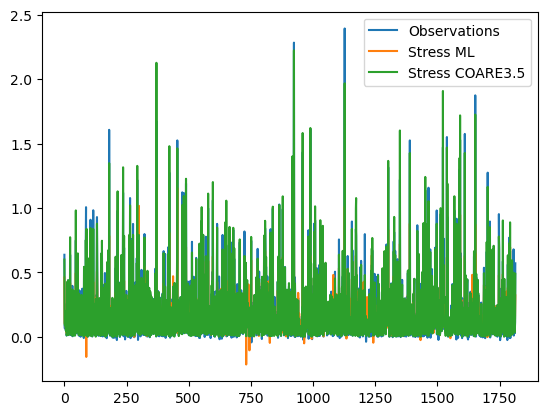

In [118]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

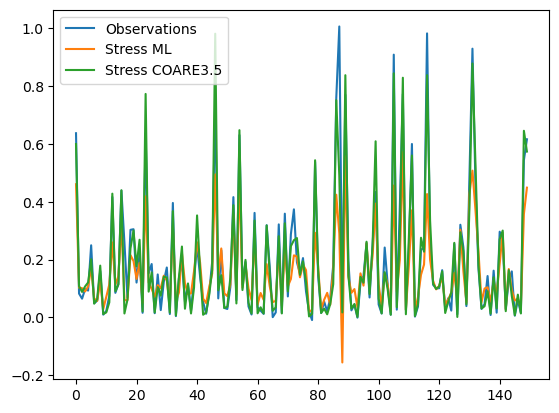

In [119]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [120]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.90787073],
       [0.90787073, 1.        ]])

In [121]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

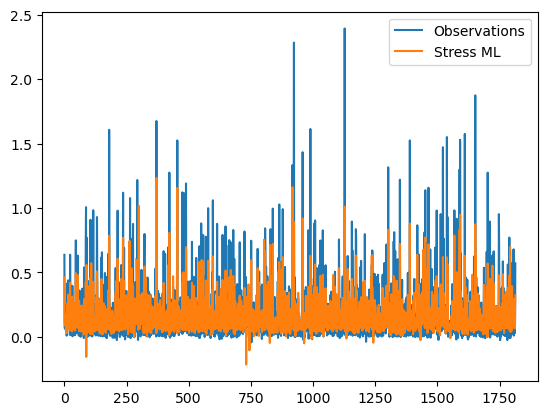

In [122]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [123]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

In [124]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.2938084222666236

Text(0, 0.5, 'Stress ML [N/m²]')

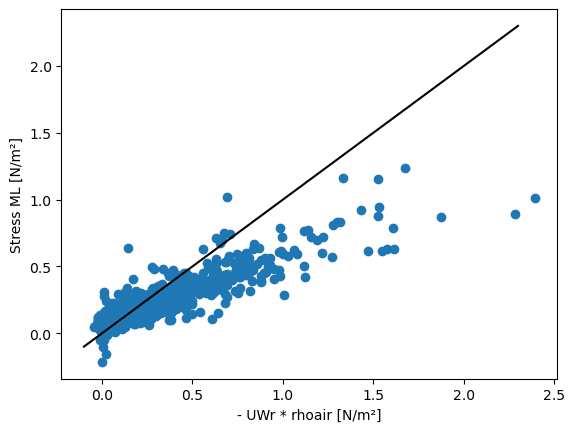

In [125]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [126]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [127]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [128]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
159/159 [==============================] - 2s 11ms/step - loss: 2.9584 - mean_absolute_error: 1.2020 - val_loss: 0.7386 - val_mean_absolute_error: 0.5127
Epoch 2/500
159/159 [==============================] - 2s 10ms/step - loss: 0.7711 - mean_absolute_error: 0.6339 - val_loss: 0.6632 - val_mean_absolute_error: 0.4495
Epoch 3/500
159/159 [==============================] - 2s 10ms/step - loss: 0.5660 - mean_absolute_error: 0.5305 - val_loss: 0.4493 - val_mean_absolute_error: 0.3873
Epoch 4/500
159/159 [==============================] - 2s 11ms/step - loss: 0.5514 - mean_absolute_error: 0.4976 - val_loss: 0.4100 - val_mean_absolute_error: 0.3616
Epoch 5/500
159/159 [==============================] - 2s 11ms/step - loss: 0.4371 - mean_absolute_error: 0.4412 - val_loss: 0.3355 - val_mean_absolute_error: 0.3157
Epoch 6/500
159/159 [==============================] - 2s 11ms/step - loss: 0.3791 - mean_absolute_error: 0.4089 - val_loss: 0.3222 - val_mean_absolute_error: 0.3356
Epoc

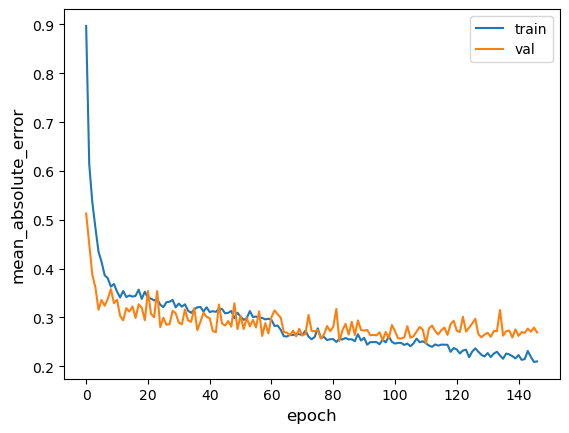

57/57 [==============================] - 0s 2ms/step - loss: 0.2313 - mean_absolute_error: 0.2785
Test accuracy 0.2784575819969177
Test loss 0.2312946915626526


In [129]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [130]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [131]:
rmse(y_test.values, y_test_pred)

0.3158677921587326

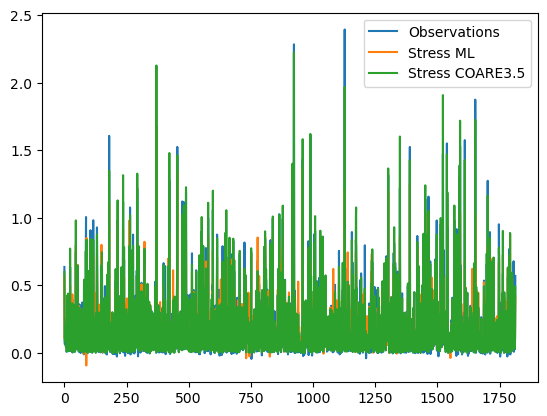

In [132]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

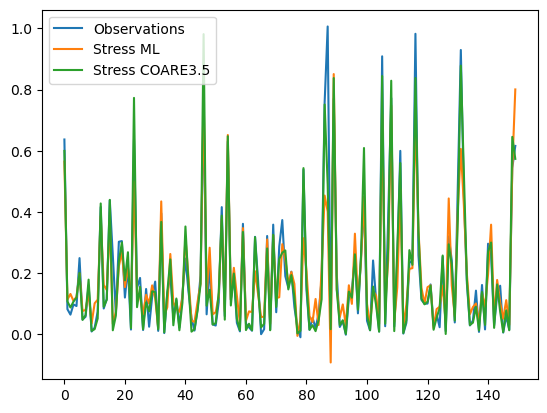

In [133]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [134]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.90990901],
       [0.90990901, 1.        ]])

In [135]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

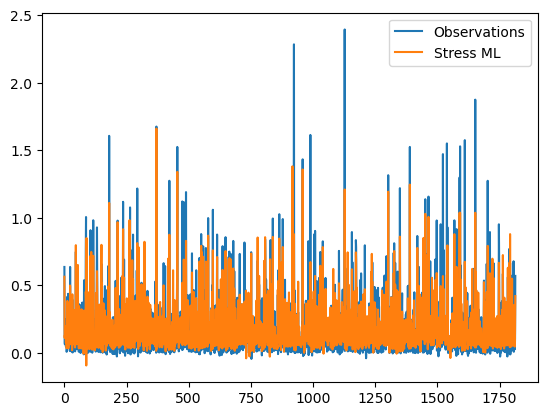

In [136]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [137]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

In [138]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3158677921587326

Text(0, 0.5, 'Stress ML [N/m²]')

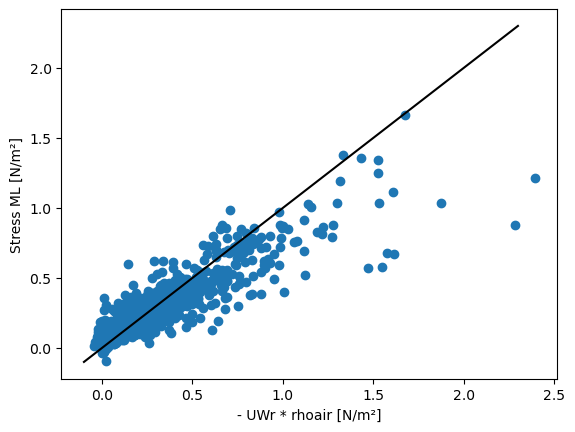

In [139]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

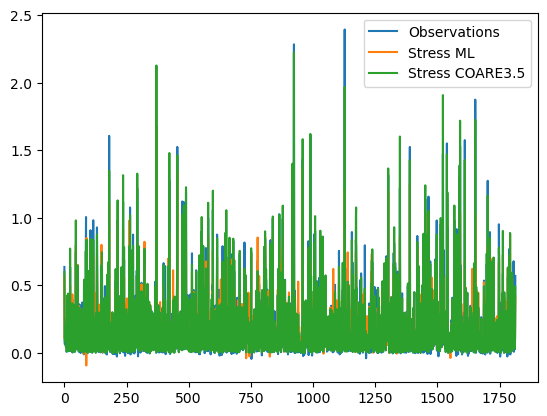

In [140]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

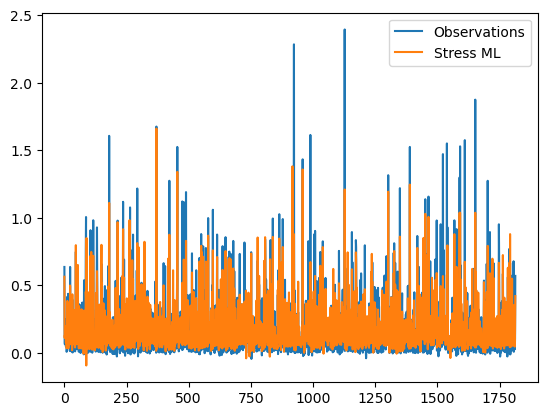

In [141]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [142]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[1.        , 0.90990901],
       [0.90990901, 1.        ]])

In [143]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

In [144]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.3158677921587326

Text(0, 0.5, 'Stress ML [N/m²]')

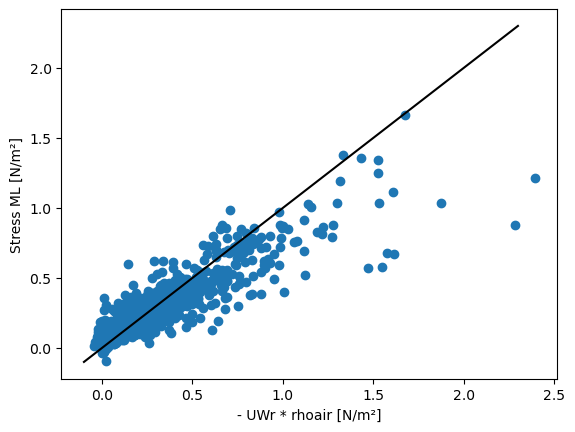

In [145]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [146]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [147]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [148]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
10/10 [==============================] - 1s 39ms/step - loss: 8.5659 - mean_absolute_error: 2.0049 - val_loss: 1.0064 - val_mean_absolute_error: 0.6629
Epoch 2/500
10/10 [==============================] - 0s 28ms/step - loss: 1.8787 - mean_absolute_error: 0.9697 - val_loss: 0.9199 - val_mean_absolute_error: 0.6245
Epoch 3/500
10/10 [==============================] - 0s 28ms/step - loss: 1.3186 - mean_absolute_error: 0.7429 - val_loss: 0.9036 - val_mean_absolute_error: 0.5885
Epoch 4/500
10/10 [==============================] - 0s 28ms/step - loss: 0.9818 - mean_absolute_error: 0.6392 - val_loss: 0.8718 - val_mean_absolute_error: 0.5725
Epoch 5/500
10/10 [==============================] - 0s 28ms/step - loss: 0.8401 - mean_absolute_error: 0.6060 - val_loss: 0.9275 - val_mean_absolute_error: 0.6469
Epoch 6/500
10/10 [==============================] - 0s 28ms/step - loss: 0.8222 - mean_absolute_error: 0.5785 - val_loss: 0.8668 - val_mean_absolute_error: 0.5959
Epoch 7/500
10/1

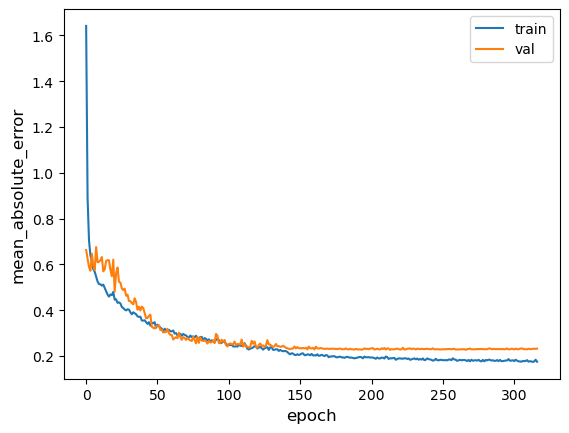

57/57 [==============================] - 0s 2ms/step - loss: 0.2035 - mean_absolute_error: 0.2422
Test accuracy 0.24217380583286285
Test loss 0.20346754789352417


In [149]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [150]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [151]:
rmse(y_test.values, y_test_pred)

0.3336347181866324

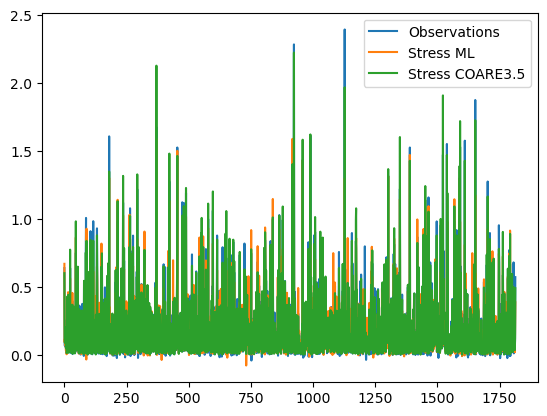

In [152]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

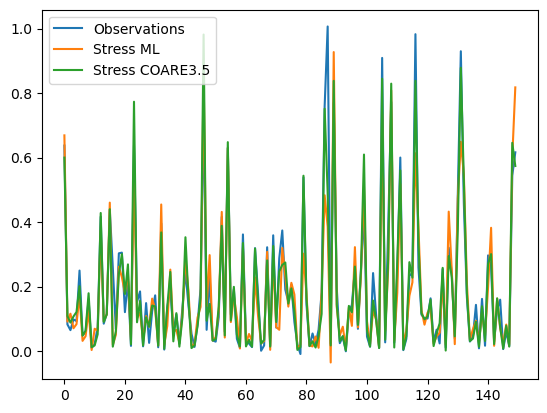

In [153]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [154]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.9111462],
       [0.9111462, 1.       ]])

In [155]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

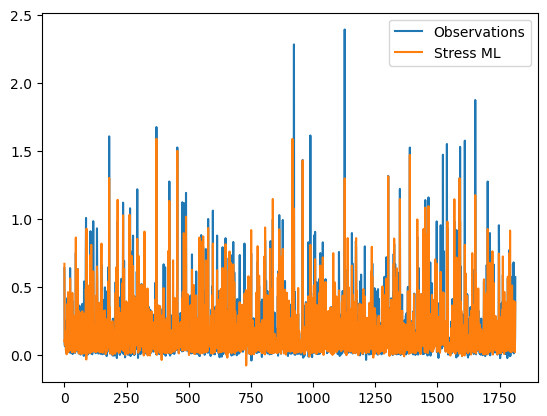

In [156]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [157]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

In [158]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3336347181866324

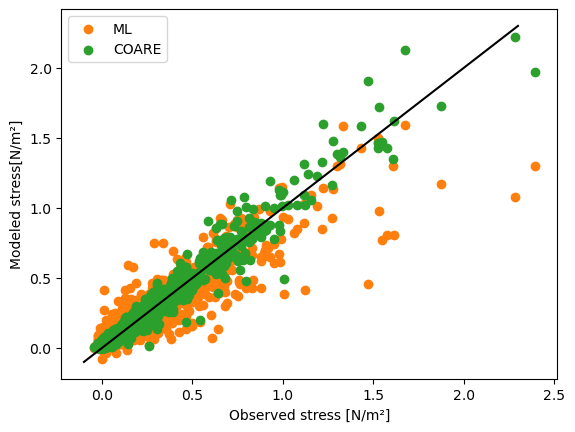

In [159]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

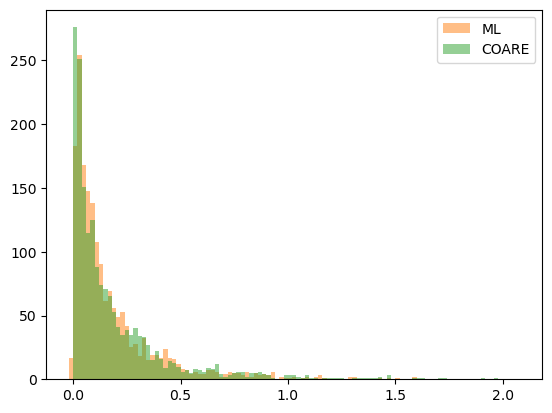

In [160]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [161]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [162]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [163]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
10/10 [==============================] - 1s 40ms/step - loss: 9.7050 - mean_absolute_error: 2.0698 - val_loss: 0.9972 - val_mean_absolute_error: 0.6499
Epoch 2/500
10/10 [==============================] - 0s 28ms/step - loss: 1.7872 - mean_absolute_error: 0.9130 - val_loss: 0.9103 - val_mean_absolute_error: 0.6199
Epoch 3/500
10/10 [==============================] - 0s 28ms/step - loss: 1.1864 - mean_absolute_error: 0.7399 - val_loss: 0.8808 - val_mean_absolute_error: 0.6428
Epoch 4/500
10/10 [==============================] - 0s 28ms/step - loss: 0.8939 - mean_absolute_error: 0.6679 - val_loss: 0.8762 - val_mean_absolute_error: 0.6378
Epoch 5/500
10/10 [==============================] - 0s 28ms/step - loss: 0.8724 - mean_absolute_error: 0.6195 - val_loss: 0.9094 - val_mean_absolute_error: 0.6745
Epoch 6/500
10/10 [==============================] - 0s 28ms/step - loss: 0.7656 - mean_absolute_error: 0.6071 - val_loss: 0.9124 - val_mean_absolute_error: 0.6335
Epoch 7/500
10/1

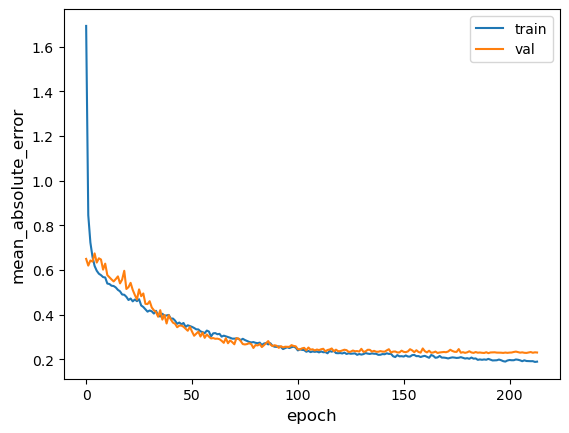

57/57 [==============================] - 0s 2ms/step - loss: 0.2052 - mean_absolute_error: 0.2398
Test accuracy 0.23976001143455505
Test loss 0.20516958832740784


In [164]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [165]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [166]:
rmse(y_test.values, y_test_pred)

0.3287133066647513

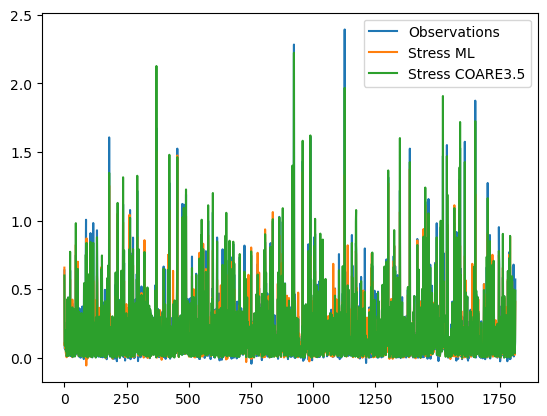

In [167]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

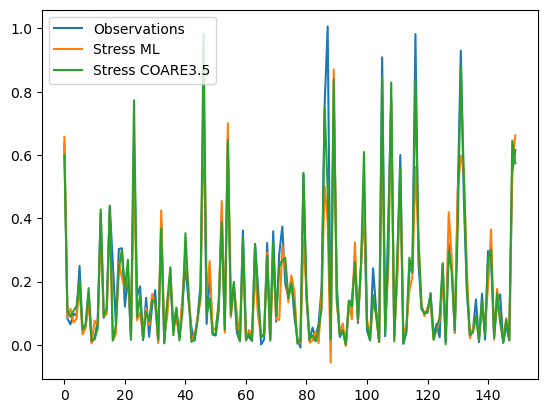

In [168]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [169]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.91379167],
       [0.91379167, 1.        ]])

In [170]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

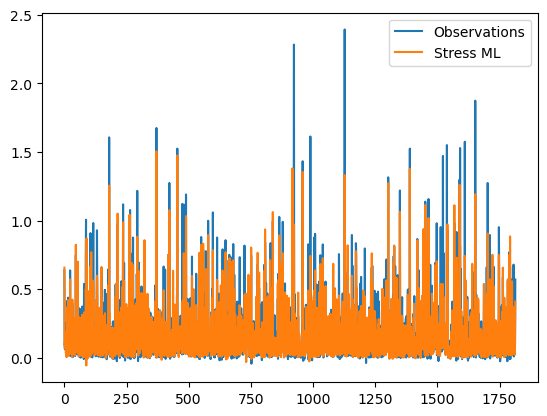

In [171]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [172]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97977732],
       [0.97977732, 1.        ]])

In [173]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.3287133066647513

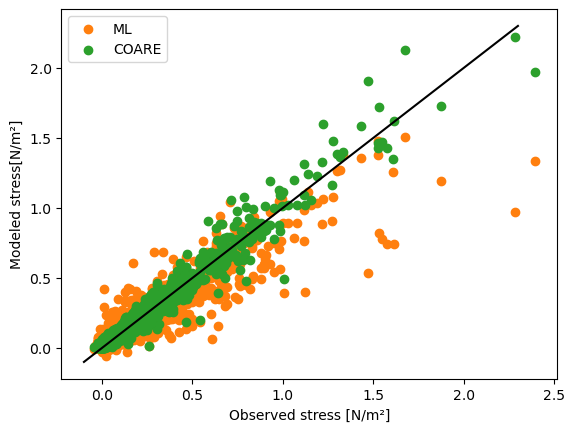

In [174]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

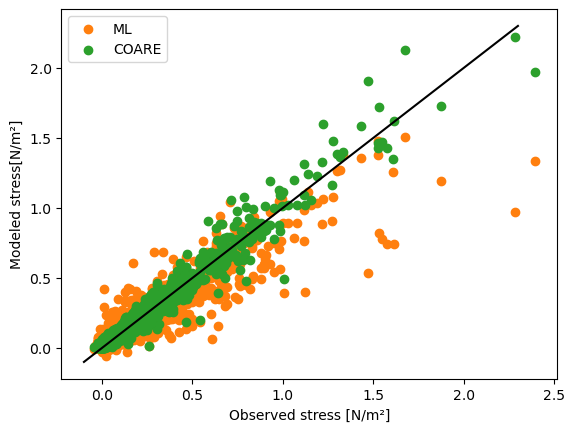

In [175]:
plt.scatter(y_test.values, y_test_pred, label='ML', color='C1')
plt.scatter(y_test.values, c_test.values, label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()